# Part 6 Reinforcement Learning
- Upper Confidence Bound UCB
- Thompson Sampling

### Upper Confidence Bound (UCB)
- this strategy is dynamic and depends on previous raunds;
- STEP 1: At each round n, we consider two numbers for each add i:
- 1.  Ni(n) - the number of times the ad i was selected up to round n;
- 2. Ri(n) - the sum of rewards of the ad i up to the round n;
- STEP 2: From these two numbers compute:
- 1. the average reward of ad i up to round n;
- 2. the confidence interval;
- STEP 3: Select the ad i that has the maximum UCB

In [3]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

1193


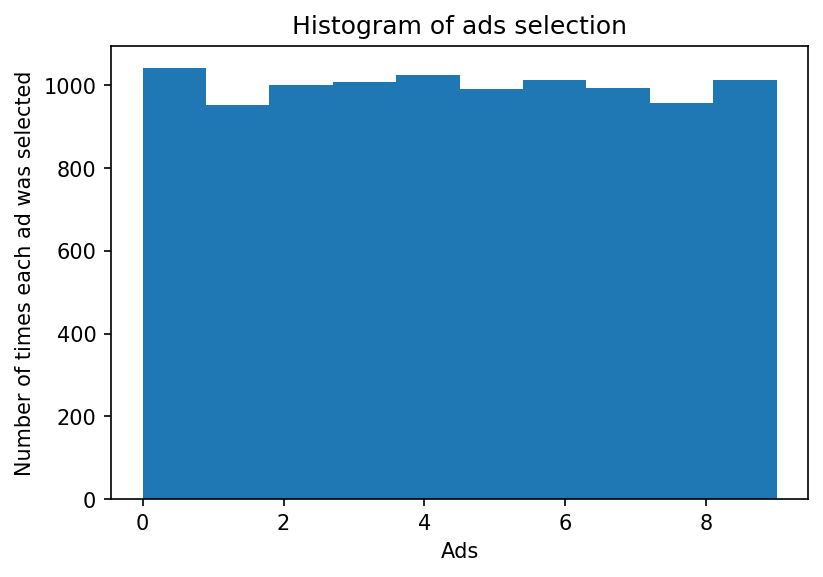

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.rcParams['figure.dpi'] = 200
print(total_reward)
plt.show()

2211


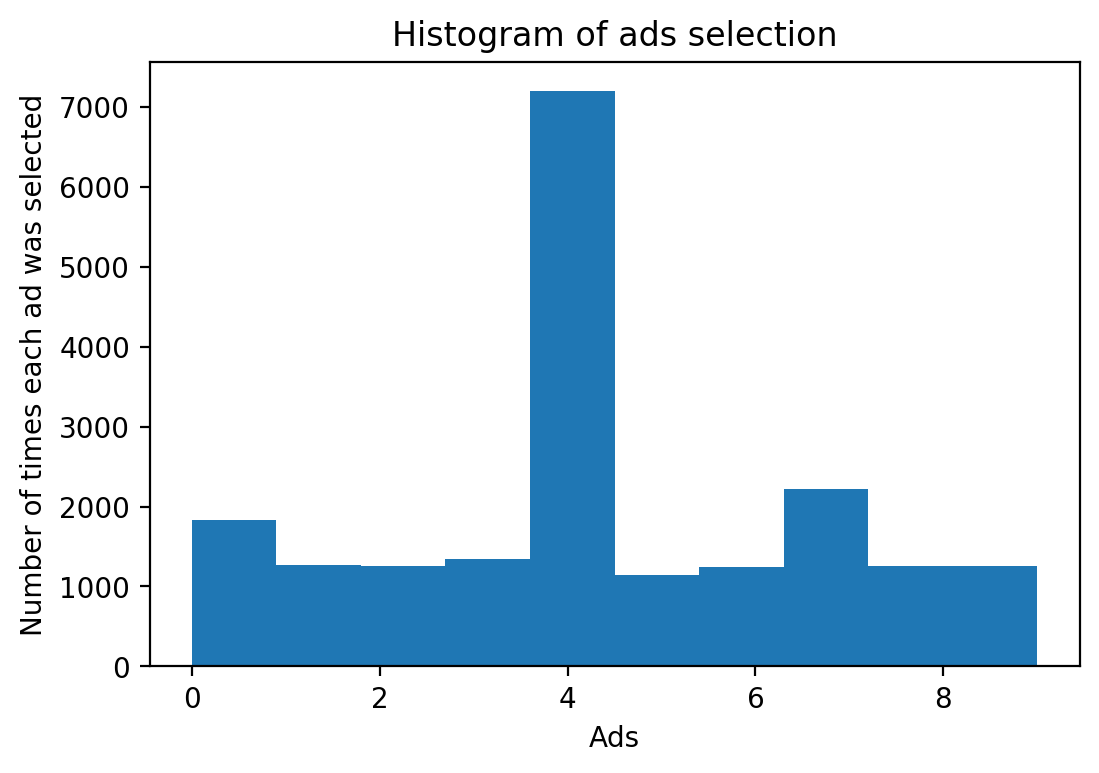

In [5]:
# Implement UCB (from scratch)

# STEP 1:
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

# STEP 2:
for n in range(N):         # number of rounds
    ad = 0
    max_upper_bound = 0
    
    for i in range(d):     # number of ad
        
        if numbers_of_selections[i] > 10:
            average_reward = sums_of_rewards[i] /numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.rcParams['figure.dpi'] = 200
print(total_reward)
plt.show()        

### Thompson Sampling
- STEP 1: At each round, n, we consider two number for each ad i:
  - N1i(n) - the number of times the ad i got reward 1 up to round n,
  - N0i(n) - the number of times the ad i got reward 0 up to round n.
- STEP 2: For each ad i, we take a random draw for the distribution below;
- STEP 3: We select the ad that has the highest (calculated before);

2606


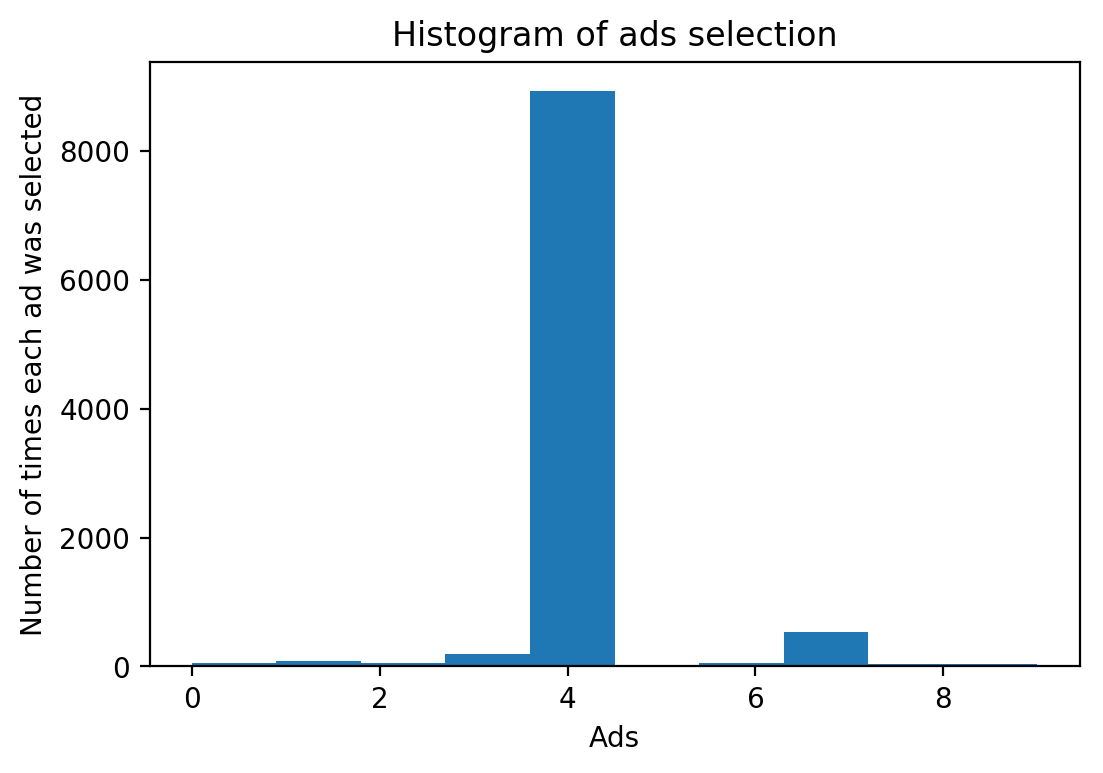

In [30]:
# Implement Thompson Sampling (from scratch)

# STEP 1:
N = 10000
d = 10
ads_selected =[]
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

# STEP 2:
for n in range(N):         # number of rounds
    ad = 0
    max_random = 0
    
    for i in range(d):     # number of ad
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1,
                                        numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    
    total_reward += reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.rcParams['figure.dpi'] = 200
print(total_reward)
plt.show()        